# sms - spam classification

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from zipfile import ZipFile

In [ ]:
file = '/content/drive/MyDrive/SentimentAnalysis/Email-Spam-Classification/archive.zip'

In [ ]:
with ZipFile(file,'r') as zip:
  zip.extractall()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.read_csv('/content/spam.csv',encoding='latin1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.head()

v1  \
0   ham   
1   ham   
2  spam   
3   ham   
4   ham   

                                                                                                                                                            v2  \
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                                Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3                                                                                                            U dun say so early hor... U c already then say...   
4                                                                                                Nah I don't think he goes to usf, he lives around here though   

  Unnamed: 2 Unnamed: 3 Unnamed: 4  
0        NaN        NaN        NaN  
1        NaN        NaN        NaN  
2        NaN        NaN        NaN  
3        NaN        NaN        NaN  
4        NaN        NaN        NaN

In [ ]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.sample(7)

v1  \
4596   ham   
3242   ham   
2139   ham   
12    spam   
2226   ham   
934   spam   
741    ham   

                                                                                                                                                                   v2  
4596                                                                                                                           Full heat pa:-) i have applyed oil pa.  
3242                                                                                                  Pls accept me for one day. Or am begging you change the number.  
2139                                                                                                                But i juz remembered i gotta bathe my dog today..  
12       URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18  
2226                                                                                                                          If you have belive me. Come to my home.  
934   Dear Matthew please call 09063440451 from a landline, your complimentary 4*Lux Tenerife holiday or å£1000 CASH await collection. ppm150 SAE T&Cs Box334 SK38XH.  
741                                                                                                    Do well :)all will for little time. Thing of good times ahead:

In [ ]:
df['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
df.rename({'v2':'mail','v1':'label'},axis=1,inplace=True)

In [ ]:
df

label  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   
5     spam   
6      ham   
7      ham   
8     spam   
9     spam   
10     ham   
11    spam   
12    spam   
13     ham   
14     ham   
15    spam   
16     ham   
17     ham   
18     ham   
19    spam   
20     ham   
21     ham   
22     ham   
23     ham   
24     ham   
25     ham   
26     ham   
27     ham   
28     ham   
29     ham   
30     ham   
31     ham   
32     ham   
33     ham   
34    spam   
35     ham   
36     ham   
37     ham   
38     ham   
39     ham   
40     ham   
41     ham   
42    spam   
43     ham   
44     ham   
45     ham   
46     ham   
47     ham   
48     ham   
49     ham   
50     ham   
51     ham   
52     ham   
53     ham   
54    spam   
55     ham   
56    spam   
57     ham   
58     ham   
59     ham   
60     ham   
61     ham   
62     ham   
63     ham   
64     ham   
65    spam   
66     ham   
67    spam   
68    spam   
69     ham   
70     ham   
71     ham   
72     ham   
73     ham   
74     ham   
75     ham   
76     ham   
77     ham   
78     ham   
79     ham   
80     ham   
81     ham   
82     ham   
83     ham   
84     ham   
85     ham   
86     ham   
87     ham   
88     ham   
89     ham   
90     ham   
91     ham   
92     ham   
93    spam   
94     ham   
95    spam   
96     ham   
97     ham   
98     ham   
99     ham   
100    ham   
101    ham   
102    ham   
103    ham   
104    ham   
105    ham   
106    ham   
107    ham   
108    ham   
109    ham   
110    ham   
111    ham   
112    ham   
113   spam   
114    ham   
115    ham   
116   spam   
117    ham   
118    ham   
119   spam   
120   spam   
121    ham   
122   spam   
123    ham   
124    ham   
125    ham   
126    ham   
127    ham   
128    ham   
129    ham   
130    ham   
131    ham   
132    ham   
133   spam   
134   spam   
135    ham   
136    ham   
137    ham   
138   spam   
139    ham   
140    ham   
141    ham   
142    ham   
143    ham   
144    ham   
145    ham   
146   spam   
147    ham   
148    ham   
149    ham   
150    ham   
151    ham   
152    ham   
153    ham   
154    ham   
155    ham   
156    ham   
157    ham   
158   spam   
159   spam   
160    ham   
161    ham   
162    ham   
163   spam   
164   spam   
165    ham   
166   spam   
167    ham   
168    ham   
169    ham   
170    ham   
171    ham   
172    ham   
173    ham   
174    ham   
175    ham   
176    ham   
177    ham   
178    ham   
179    ham   
180    ham   
181    ham   
182    ham   
183    ham   
184    ham   
185    ham   
186    ham   
187   spam   
188    ham   
189    ham   
190   spam   
191    ham   
192    ham   
193    ham   
194    ham   
195    ham   
196    ham   
197    ham   
198    ham   
199    ham   
200    ham   
201    ham   
202    ham   
203    ham   
204    ham   
205    ham   
206    ham   
207    ham   
208    ham   
209    ham   
210    ham   
211    ham   
212    ham   
213    ham   
214    ham   
215    ham   
216    ham   
217    ham   
218    ham   
219    ham   
220    ham   
221    ham   
222    ham   
223    ham   
224   spam   
225    ham   
226   spam   
227    ham   
228    ham   
229    ham   
230    ham   
231    ham   
232    ham   
233    ham   
234   spam   
235    ham   
236    ham   
237    ham   
238    ham   
239   spam   
240    ham   
241    ham   
242    ham   
243    ham   
244    ham   
245    ham   
246    ham   
247    ham   
248    ham   
249   spam   
250    ham   
251    ham   
252    ham   
253    ham   
254    ham   
255    ham   
256    ham   
257    ham   
258   spam   
259    ham   
260    ham   
261    ham   
262    ham   
263   spam   
264    ham   
265    ham   
266    ham   
267   spam   
268    ham   
269   spam   
270    ham   
271    ham   
272   spam   
273    ham   
274    ham   
275    ham   
276    ham   
277    ham   
278    ham   
279    ham   
280    ham   
281    ham   
282    ham   
283    ham   
284    ham   
2

In [ ]:
df.iloc[:,0].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

##### Class Imbalance is there

In [ ]:
df['label'].replace({'ham':0,'spam':1},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   mail    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
df.sample(7)

label  \
2084      0   
3686      0   
3026      0   
3220      1   
81        0   
4905      0   
326       0   

                                                                                                                                                               mail  
2084                                                                                                                         How are you. Wish you a great semester  
3686                                                                                                                         Great! I shoot big loads so get ready!  
3026                                                                                                                                         You still at the game?  
3220  Thanks for your ringtone order, reference number X29. Your mobile will be charged 4.50. Should your tone not arrive please call customer services 09065989180  
81                                                                                                                                 K. Did you call me just now ah?   
4905                                                                                                                               Will you come online today night  
326                                                                                                                                 Hi da:)how is the todays class?

*Text Preprocessing*

- Removing URL's
- Removing HTML Tags
- Removing StopWords
- Tokenization
- Stemming / Lemmetization


In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from string import punctuation
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocess(txt):
  ps = PorterStemmer()
  out = re.findall(r'https?://\S+|www\.\S+|.com',txt)

  if(len(out)):
    for i in out:
      txt = txt.replace(i,"")

  out = re.findall(r'<.*?>',txt)
  if(len(out)):
    for i in out:
      txt = txt.replace(i,"")
  txt = txt.lower()
  if(len(out)):
    for i in out:
      txt = txt.replace(i,"")
  word_removal = stopwords.words('english')
  y = []
  for i in word_tokenize(txt):
    if (i not in word_removal and i not in punctuation):
      y.append(i)
  txt = y[:]
  y.clear()
  txt = " ".join(txt)
  txt = re.sub(r'\.{2,}', '', txt)
  y = []
  for i in txt:
    y.append(ps.stem(i))
  txt = y[:]
  y.clear()
  txt = "".join(txt)
  return txt

In [ ]:
preprocess(df['mail'][0])

'go jurong point crazy  available bugis n great world la e buffet  cine got amore wat '

In [ ]:
df['chars'] = df['mail'].str.len()

In [ ]:
df['words'] = df['mail'].apply(word_tokenize).str.len()

In [ ]:
df['sent'] = df['mail'].apply(sent_tokenize).str.len()

In [ ]:
df.head()

label  \
0      0   
1      0   
2      1   
3      0   
4      0   

                                                                                                                                                          mail  \
0                                              Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
1                                                                                                                                Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3                                                                                                            U dun say so early hor... U c already then say...   
4                                                                                                Nah I don't think he goes to usf, he lives around here though   

   chars  words  sent  
0    111     24     2  
1     29      8     2  
2    155     37     2  
3     49     13     1  
4     61     15     1

In [ ]:
df['mail'] = df['mail'].apply(preprocess)

In [ ]:
df['chars'] = df['mail'].str.len()
df['words'] = df['mail'].apply(word_tokenize).str.len()
df['sent'] = df['mail'].apply(sent_tokenize).str.len()

In [ ]:
df.head()

label  \
0      0   
1      0   
2      1   
3      0   
4      0   

                                                                                                                                        mail  \
0                                                      go jurong point crazy  available bugis n great world la e buffet  cine got amore wat    
1                                                                                                                  ok lar  joking wif u oni    
2  free entry 2 wklyp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question std txt rate c 's apply 08452810075over18 's   
3                                                                                                      u dun say early hor  u c already say    
4                                                                                                 nah n't think goes usf lives around though   

   chars  words  sent  
0     85     16     1  
1     25      6     1  
2    137     26     1  
3     37      9     1  
4     42      8     1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   mail    5572 non-null   object
 2   chars   5572 non-null   int64 
 3   words   5572 non-null   int64 
 4   sent    5572 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 217.8+ KB


#### Analyzing Spam & Ham

In [ ]:
df_ham = df[(df['label']==0)]
df_spam = df[(df['label']==1)]

In [ ]:
df_ham.iloc[:,2:].describe()

chars        words         sent
count  4825.000000  4825.000000  4825.000000
mean     46.296166     8.544041     1.001658
std      38.896160     6.888367     0.067511
min       0.000000     0.000000     0.000000
25%      21.000000     4.000000     1.000000
50%      34.000000     6.000000     1.000000
75%      61.000000    11.000000     1.000000
max     532.000000    81.000000     2.000000

In [ ]:
df_spam.iloc[:,2:].describe()

chars       words       sent
count  747.000000  747.000000  747.00000
mean   106.274431   16.934404    1.01071
std     26.656809    4.798596    0.10300
min     13.000000    2.000000    1.00000
25%     94.500000   14.000000    1.00000
50%    112.000000   17.000000    1.00000
75%    124.000000   20.000000    1.00000
max    161.000000   28.000000    2.00000

In [ ]:
removal_idx= df[df['words']>28].index

In [ ]:
df.drop(index=removal_idx,inplace=True)

In [ ]:
df_ham = df[(df['label']==0)]
df_spam = df[(df['label']==1)]

In [ ]:
df_ham.iloc[:,2:].describe()

chars        words         sent
count  4760.000000  4760.000000  4760.000000
mean     43.790126     8.090336     1.001471
std      31.070538     5.494102     0.066412
min       0.000000     0.000000     0.000000
25%      21.000000     4.000000     1.000000
50%      34.000000     6.000000     1.000000
75%      59.000000    11.000000     1.000000
max     210.000000    28.000000     2.000000

In [ ]:
df_spam.iloc[:,2:].describe()

chars       words       sent
count  747.000000  747.000000  747.00000
mean   106.274431   16.934404    1.01071
std     26.656809    4.798596    0.10300
min     13.000000    2.000000    1.00000
25%     94.500000   14.000000    1.00000
50%    112.000000   17.000000    1.00000
75%    124.000000   20.000000    1.00000
max    161.000000   28.000000    2.00000

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
txt_spam = []
txt_ham = []

In [ ]:
for i in df_ham['mail']:
  txt_ham.append(i)
txt_ham = " ".join(txt_ham)
for j in df_spam['mail']:
  txt_spam.append(j)
txt_spam = " ".join(txt_spam)

In [ ]:
len(txt_ham)

213200

In [ ]:
len(txt_spam)

80133

In [ ]:
from collections import Counter

In [ ]:
c1 = Counter(word_tokenize(txt_ham))
c2 = Counter(word_tokenize(txt_spam))

In [ ]:
c1.most_common(500)

[('u', 891),
 ("'s", 396),
 ("'m", 369),
 ("n't", 306),
 ('get', 281),
 ('2', 265),
 ('lt', 260),
 ('gt', 260),
 ('ok', 241),
 ('got', 238),
 ('go', 235),
 ('``', 233),
 ('call', 223),
 ('ur', 222),
 ('know', 218),
 ('like', 217),
 ('good', 217),
 ("'ll", 216),
 ('time', 186),
 ('love', 182),
 ('day', 171),
 ('going', 164),
 ('lor', 159),
 ('home', 158),
 ('one', 157),
 ('want', 154),
 ('4', 150),
 ('sorry', 149),
 ('da', 148),
 ('still', 144),
 ('need', 143),
 ('see', 133),
 ('later', 133),
 ('today', 127),
 ('think', 124),
 ('dont', 123),
 ('back', 122),
 ('n', 119),
 ('ì_', 117),
 ('take', 116),
 ('send', 115),
 ('hi', 115),
 ('tell', 113),
 ('r', 113),
 ('k', 109),
 ('oh', 109),
 ('pls', 109),
 ('well', 109),
 ('much', 108),
 ('night', 107),
 ('dear', 102),
 ('wat', 101),
 ('hope', 101),
 ('great', 98),
 ('way', 97),
 ('hey', 95),
 ('na', 93),
 ('work', 92),
 ('already', 89),
 ("'re", 86),
 ('yeah', 86),
 ('e', 84),
 ('say', 84),
 ('ask', 84),
 ('give', 84),
 ('right', 83),
 ('happ

In [ ]:
c2.most_common(500)

[('call', 346),
 ('free', 219),
 ('2', 174),
 ('txt', 156),
 ('ur', 144),
 ('u', 141),
 ('mobile', 122),
 ('text', 121),
 ('4', 120),
 ('stop', 114),
 ('claim', 113),
 ('reply', 104),
 ('prize', 92),
 ('get', 84),
 ("'s", 70),
 ('new', 69),
 ('send', 68),
 ('nokia', 65),
 ('cash', 62),
 ('urgent', 62),
 ('win', 60),
 ('contact', 56),
 ('service', 55),
 ('please', 54),
 ('c', 51),
 ('week', 51),
 ('guaranteed', 50),
 ('customer', 49),
 ('tone', 48),
 ('per', 46),
 ('phone', 45),
 ('chat', 43),
 ('cs', 41),
 ('draw', 39),
 ('awarded', 38),
 ('latest', 36),
 ('å£1000', 35),
 ('mins', 35),
 ('line', 35),
 ('1', 34),
 ('150ppm', 34),
 ('receive', 33),
 ('camera', 33),
 ('every', 33),
 ('holiday', 32),
 ('landline', 32),
 ('message', 31),
 ('shows', 31),
 ('r', 30),
 ('want', 30),
 ('go', 30),
 ('box', 30),
 ('number', 30),
 ('apply', 29),
 ('code', 29),
 ('ringtone', 29),
 ('live', 29),
 ('video', 29),
 ('po', 29),
 ('msg', 28),
 ('award', 28),
 ('150p', 27),
 ('chance', 27),
 ('entry', 26)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB,ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
x1 = TfidfVectorizer(max_features=1500)

In [ ]:
bow = x1.fit_transform(df['mail'])

In [ ]:
#(x1.vocabulary_)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(bow.toarray(),df['label'],test_size=0.2)

In [ ]:
m1 = MultinomialNB()

In [ ]:
m1.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred = m1.predict(X_test)

In [ ]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9836660617059891
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       988
           1       0.86      1.00      0.93       114

    accuracy                           0.98      1102
   macro avg       0.93      0.99      0.96      1102
weighted avg       0.99      0.98      0.98      1102



In [ ]:
m2 = BernoulliNB()

In [ ]:
m2.fit(X_train,y_train)
y_pred2 = m2.predict(X_test)
print(accuracy_score(y_pred2,y_test))
print(classification_report(y_pred2,y_test))

0.9863883847549909
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       985
           1       0.89      1.00      0.94       117

    accuracy                           0.99      1102
   macro avg       0.94      0.99      0.97      1102
weighted avg       0.99      0.99      0.99      1102



In [ ]:
m3 = ComplementNB()

In [ ]:
m3.fit(X_train,y_train)
y_pred3 = m3.predict(X_test)
print(accuracy_score(y_pred3,y_test))
print(classification_report(y_pred3,y_test))

0.9591651542649727
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       935
           1       0.96      0.76      0.85       167

    accuracy                           0.96      1102
   macro avg       0.96      0.88      0.91      1102
weighted avg       0.96      0.96      0.96      1102



In [ ]:
def input_tokenize(txt):

  return x1.transform(txt)


In [ ]:
m4 = RandomForestClassifier()

In [ ]:
m4.fit(X_train,y_train)
y_pred4 = m4.predict(X_test)
print(accuracy_score(y_pred4,y_test))
print(classification_report(y_pred4,y_test))

0.984573502722323
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       987
           1       0.87      1.00      0.93       115

    accuracy                           0.98      1102
   macro avg       0.94      0.99      0.96      1102
weighted avg       0.99      0.98      0.99      1102



In [ ]:
cm = confusion_matrix(y_pred4,y_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

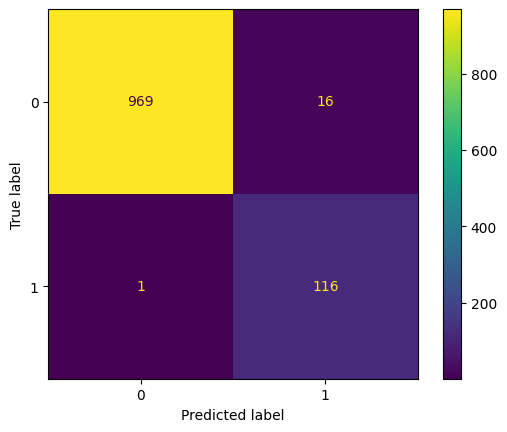

In [ ]:
ConfusionMatrixDisplay(cm).plot()

In [ ]:
1 - 1 / 117

0.9914529914529915

In [ ]:
116 / (116 + 16)

0.8787878787878788

In [ ]:
cm

array([[969,  16],
       [  1, 116]])

In [ ]:
inp = input_tokenize(['''

Hello Yash,
In the coming weeks, Google Play will launch new personalization options that give you more seamless control of your personalization preferences and allow you to better manage your data in Play.
Personalization provides a richer experience in the Play store, helping you discover exciting games, useful apps, relevant offers and much more, all of which is tailored to you. Learn more about personalizing your Google Play Store experience
Once available, these new features - alongside existing Play personalization controls - will be easily accessible by visiting Personalization in Play from the Google Play Store menu. This new destination will be a one-stop-shop for tailoring your personalization preferences in Play, giving you a more powerful way to:

•	Manage all of your personalization options on Google Play and easily view activity and access personalization controls

•	Choose which apps, books or other library items are used to personalize your Google Play experience. With one click you will be able to exclude use of Play data associated with that app for personalization in Play. Some examples of data that would be excluded for that app would include when you install or uninstall it, purchases that you make in it and your app activity. Learn more about new personalization options
With these enhanced controls you can ensure that you have a better Play experience that is personalized to you and continues to respect your privacy preferences.
Should you have any questions please visit our Help Center or get in touch.
Thank you for using Google Play! '''])

In [ ]:
m4.predict(inp)

array([0])